## Bank Marketing Project Part 2: Cluster Analysis for Customer Segmentation

### The Goal for This Notebook: Customer Segmentation Analysis
In part1, I conducted a detail exploratory analysis for the original data set then used the obtained insights to preprocess the data. 

In this section, I want to further apply the unsupervised cluster technique to learn the characteristic of different customer segments. I also plan to look for any shared features that might influence different cluster to make their decision to subscribe the product.



### Methodology
1. Feature Selection: remove less predictive feature
2. Clustering:Find optimal cluster number by elbow method and Silhouette score method
3. Visualization: visualize the clustering results in 2D by applying the Principle Component Analysis to reduce the dimension
4. Conduct the Customer Segmentation Analysis

### 1. Feature Selection
To achieve the goal, firstly at the preprocessing stage we applied the feature selection technique on the whole dataset to remove features that doesn’t vary much within itself which has very little predictive power. By using the VarianceThreshold function in sklearn module that allow us to see the variance of all the features and set variance threshold to remove the ones that contain less information.


For our dataset, there are 17 features originally, 7 of them are numerical variables and the rest are categorical variables. At the preprocessing stage, we first transformed the categorical variables into dummy variables, for which gave us 46 features in total, then we used MinMaxScaler function from sklearn module to normalize all the features.


The variance for 46 features have a range between 0 and 0.25, and we decided to remove 28 features that have their variance below 0.1, and that left us with 18 features to continue the further clustering work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#load the data
x=pd.read_csv("C:/Users/Rai Chiang/Desktop/DePaul Course/CSC478/final project/X_train")
y=pd.read_csv("C:/Users/Rai Chiang/Desktop/DePaul Course/CSC478/final project/y_train")
x.drop(["Unnamed: 0"],axis=1,inplace=True)
y.drop(["Unnamed: 0"],axis=1,inplace=True)
data_train_x_y=pd.concat([x,y],axis=1)


features with variance <0.1
   filter out features
0                  age
1              balance
2                  day
3             duration
4             campaign
5                pdays
6             previous
7     job_entrepreneur
8        job_housemaid
9          job_retired
10   job_self-employed
11        job_services
12         job_student
13      job_unemployed
14          default_no
15         default_yes
16    contact_cellular
17   contact_telephone
18           month_apr
19           month_dec
20           month_feb
21           month_jan
22           month_mar
23           month_nov
24           month_oct
25           month_sep
26    poutcome_pending
27                   y

features with variance >0.1
    variance              feature
0   0.248020          housing_yes
1   0.248020           housing_no
2   0.246366  education_secondary
3   0.238382      marital_married
4   0.213968            month_may
5   0.202157   education_tertiary
6   0.199624       marital_single
7  

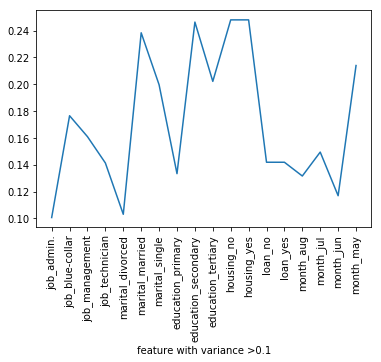

In [477]:
# Feature selection by variance with sklearn VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
train_data_A_fs=selector.fit_transform(data_train_x_y)

selected_variances=selector.variances_[selector.get_support(indices=True)]
name=bank_table.columns.values[selector.get_support(indices =True)]
variance_tb=pd.DataFrame(sorted(zip(selected_variances,name),reverse=True),columns=["variance","feature"])

#filter out the variance <0.1 
filter_out=[]
for i in bank_table.columns.values:
    if i not in (bank_table.columns.values[selector.get_support(indices =True)]):
        filter_out.append(i)
filter_out_tb=pd.DataFrame(filter_out,columns=["filter out features"])


plt.plot(name,selected_variances)
plt.xticks(rotation='vertical')
plt.xlabel("feature with variance >0.1")

print "\nfeatures with variance <0.1"
print filter_out_tb

print "\nfeatures with variance >0.1"
print variance_tb


### 2.Clustering
Next, two methods are used to find the optimal number of clusters when conducting K Means Clustering. The elbow method and the Silhouette score method.


The elbow method calculated the sum of intra-cluster distance between each point in the given cluster to it's closest centroid. The method looks at the variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. 


The second method is the Silhouette score method, it uses the mean intra-cluster distance and the mean nearest-cluster distance for each sample to calculate the separation distance between the resulting clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.


In [366]:
#finding optimal K with elbow method and silhouette_scor method

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_range=range(2,18,2)
intra_class_similarity=[]
silhouette_avg1=[]


for i in cluster_range:
    kmeans_optimal=KMeans(n_clusters=i,max_iter=500,random_state=88)
    kmeans_optimal.fit(train_data_A_fs)
    intra_class_similarity.append(kmeans_optimal.inertia_)
    prediction=kmeans_optimal.fit_predict(train_data_A_fs)
    silhouette_avg1.append(silhouette_score(train_data_A_fs,prediction,sample_size=1000))


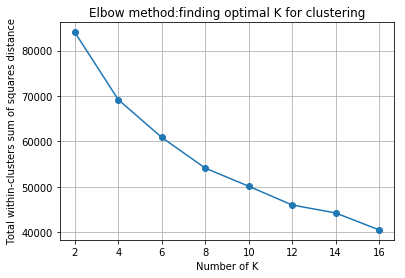

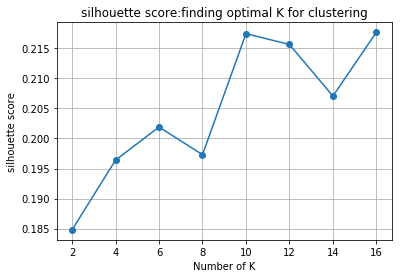

   # of K      Distance
0       2  84053.674463
1       4  69188.966056
2       6  60868.880593
3       8  54098.139055
4      10  50097.291797
5      12  45964.379710
6      14  44213.657856
7      16  40473.495963

   # of K  Silhouette Score
0       2          0.184783
1       4          0.196399
2       6          0.201911
3       8          0.197307
4      10          0.217453
5      12          0.215647
6      14          0.207067
7      16          0.217685


In [479]:
#plot above results

find_k=zip(cluster_range,intra_class_similarity)
find_k1=pd.DataFrame(find_k,columns=["# of K","Distance"])

find_k2=zip(cluster_range,silhouette_avg1)
find_k3=pd.DataFrame(find_k2,columns=["# of K","Silhouette Score"])

plt.grid(True)
plt.plot(cluster_range,intra_class_similarity,marker = "o")
plt.title("Elbow method:finding optimal K for clustering")
plt.ylabel("Total within-clusters sum of squares distance")
plt.xlabel("Number of K")
plt.show()

plt.grid(True)
plt.plot(cluster_range,silhouette_avg1,marker = "o")
plt.title("silhouette score:finding optimal K for clustering")
plt.ylabel("silhouette score")
plt.xlabel("Number of K")
plt.show()


print find_k1
print "\n",find_k3


In [316]:
#evaluate the results when k=10

kmeans_optimal=KMeans(n_clusters=10,max_iter=500,random_state=97)
kmeans_optimal.fit(train_data_A_fs)
cluster_prediction=kmeans_optimal.predict(train_data_A_fs)
print silhouette_score(train_data_A_fs,cluster_prediction,sample_size=1000)

0.21926308131650726


#### With the result above, when k=10 the marginal gain for intra-cluster distance starts dropping significantly and at that point the Silhouette score happens to be the highest among all the cluster number, therefore, we decided to choose k=10 to cluster the data.

### 3. PCA dimension reduction: Plot data in a 2 dimensional space
To make it easier to understand, I apply the PCA to reduce the dimension to visulize 2 plots in 2D, a) the clustering result plot and b) the original data set.

a).The first plot indicates the result when applying k=10 on K means clustering. According to the Silhouette score chart, when k= 10 the Silhouette score is 0.217 though it’s the highest score among the chart, it’s still very close to 0, which indicates that most of the clusters are somehow overlapped in the high dimensions.


b).The second plot visualize 18 features on a 2D plot for the original data before clustering, the data is transformed into two dimension space and plotted  with the first 2 principle components that capture 0.2 and 0.14 variance from the original data individually.



[0.20139831 0.14420599]


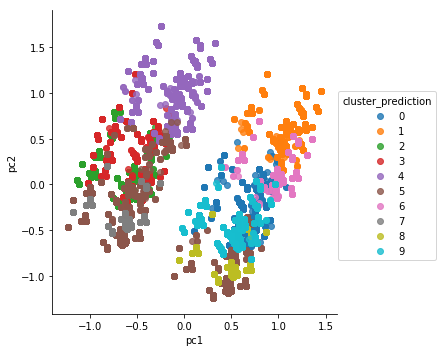

Text(0,0.5,'PC2')

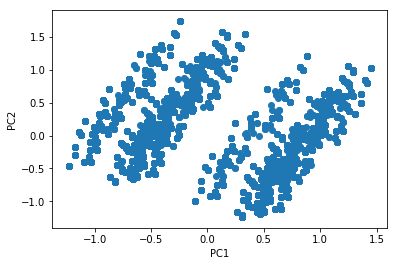

In [317]:
#apply pca to transform the dimension for ploting purpose

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trans_train=pca.fit(train_data_A_fs).transform(train_data_A_fs)

print(pca.explained_variance_ratio_) 
pc1=pd.DataFrame(trans_train[:,0],columns=["pc1"])
pc2=pd.DataFrame(trans_train[:,1],columns=["pc2"])
pcs=pd.concat([pc1,pc2],axis=1)
cluster_prediction1=pd.DataFrame(cluster_prediction,columns=["cluster_prediction"])
cluster_plot=pd.concat([pcs,cluster_prediction1],axis=1)

sns.lmplot(data=cluster_plot, x='pc1', y='pc2', hue='cluster_prediction', fit_reg=False, legend=True, legend_out=True)
plt.show()


plt.scatter(cluster_plot.pc1,cluster_plot.pc2)
plt.xlabel("PC1")
plt.ylabel("PC2")

### 4. Customer Segmentation Analysis



For the 10 clusters, I decided to look into the y variable distribution and evaluate the yes ratio of the clients who subscribe the product to the total number of clients in each cluster. 


a). I choose the top 3 clusters that have the highest yes ratio and 1 cluster that has the lowest yes ratio.

b). Then evaluate the cluster centroids for the chosen clusters because cluster centroid is the mean of the cluster we can look at it as the representation of the cluster.  

c). Lastly, I'll look into the top 10 features from those clusters that influence the clients to subscribe the product most significantly by feature selection for further analysis.


##### Summary

a) cluster 1 has the highest conversion rate of 0.137, cluster 9 ranks second 0.125, and cluster 6 ranks the third 0.109. Cluster 3 has the lowest conversion rate 0.027.

b)
cluster1:on average, the members have no house loan and no personal loan, their education level are tertiary, they are single. Most of them have a management career and some of them are technicians.

cluster 9:on average, the members have no house loan and no personal loan, their education level is secondary, they are single. Most of them are technicians and some of them are the administrant or blue collar.

cluster 6:on average the members have no house loan and no personal loan, their education level is tertiary. Most of them have a management career and some of them work as technicians but unlike cluster 1 and 9, on average, the members in cluster 6 are married.

cluster 3:on average, the members have a house loan but no personal loan, their education level is primary, their career is blue-collar and most of them are married.

c). Overall, I find that there seem to have some kind of promotion event on month August and July because for all the clusters these 2 features are significantly influential for the customers to subscribe the product. The personal loan is another common feature among clusters that are influential for clients to subscribe the product.

In [373]:
#create tables to map the observation with its y values and predicted cluster labels 

fs_column_index=bank_table.columns.values[selector.get_support(indices =True)]
fs_index_tb=pd.DataFrame(train_data_A_fs,columns=fs_column_index)
target_tb=pd.DataFrame(target_f,columns=["y"])

tb_fs_without_y=pd.concat([fs_index_tb,cluster_prediction1],axis=1)
tb_fs_with_y=pd.concat([tb_fs_without_y,target_tb],axis=1)

In [480]:
#create dataframe for different cluster for further analysis

cluster_0=pd.DataFrame(tb_fs_with_y[cluster_prediction==0])
cluster_1=pd.DataFrame(tb_fs_with_y[cluster_prediction==1])
cluster_2=pd.DataFrame(tb_fs_with_y[cluster_prediction==2])
cluster_3=pd.DataFrame(tb_fs_with_y[cluster_prediction==3])
cluster_4=pd.DataFrame(tb_fs_with_y[cluster_prediction==4])
cluster_5=pd.DataFrame(tb_fs_with_y[cluster_prediction==5])
cluster_6=pd.DataFrame(tb_fs_with_y[cluster_prediction==6])
cluster_7=pd.DataFrame(tb_fs_with_y[cluster_prediction==7])
cluster_8=pd.DataFrame(tb_fs_with_y[cluster_prediction==8])
cluster_9=pd.DataFrame(tb_fs_with_y[cluster_prediction==9])

c0_0=cluster_0[["y"]][(cluster_0[["y"]]==0)].count()
c0_1=cluster_0[["y"]][(cluster_0[["y"]]==1)].count()
c0=pd.concat([c0_0,c0_1],axis=1)

c1_0=cluster_1[["y"]][(cluster_1[["y"]]==0)].count()
c1_1=cluster_1[["y"]][(cluster_1[["y"]]==1)].count()
c1=pd.concat([c1_0,c1_1],axis=1)

c2_0=cluster_2[["y"]][(cluster_2[["y"]]==0)].count()
c2_1=cluster_2[["y"]][(cluster_2[["y"]]==1)].count()
c2=pd.concat([c2_0,c2_1],axis=1)

c3_0=cluster_3[["y"]][(cluster_3[["y"]]==0)].count()
c3_1=cluster_3[["y"]][(cluster_3[["y"]]==1)].count()
c3=pd.concat([c3_0,c3_1],axis=1)

c4_0=cluster_4[["y"]][(cluster_4[["y"]]==0)].count()
c4_1=cluster_4[["y"]][(cluster_4[["y"]]==1)].count()
c4=pd.concat([c4_0,c4_1],axis=1)

c5_0=cluster_5[["y"]][(cluster_5[["y"]]==0)].count()
c5_1=cluster_5[["y"]][(cluster_5[["y"]]==1)].count()
c5=pd.concat([c5_0,c5_1],axis=1)

c6_0=cluster_6[["y"]][(cluster_6[["y"]]==0)].count()
c6_1=cluster_6[["y"]][(cluster_6[["y"]]==1)].count()
c6=pd.concat([c6_0,c6_1],axis=1)

c7_0=cluster_7[["y"]][(cluster_7[["y"]]==0)].count()
c7_1=cluster_7[["y"]][(cluster_7[["y"]]==1)].count()
c7=pd.concat([c7_0,c7_1],axis=1)

c8_0=cluster_8[["y"]][(cluster_8[["y"]]==0)].count()
c8_1=cluster_8[["y"]][(cluster_8[["y"]]==1)].count()
c8=pd.concat([c8_0,c8_1],axis=1)

c9_0=cluster_9[["y"]][(cluster_9[["y"]]==0)].count()
c9_1=cluster_9[["y"]][(cluster_9[["y"]]==1)].count()
c9=pd.concat([c9_0,c9_1],axis=1)



### a). Calculate the ratio of the clients who subscribe the product to the total number of clients in the cluster

,No,Yes,ratio/Conversion Rate
Cluster 0,2182,160,0.068318
Cluster 1,2009,319,0.137027
Cluster 2,3658,171,0.044659
Cluster 3,2727,76,0.027114
Cluster 4,3984,212,0.050524
Cluster 5,3023,90,0.028911
Cluster 6,2363,292,0.109981
Cluster 7,4990,175,0.033882
Cluster 8,3456,326,0.086198
Cluster 9,2650,379,0.125124


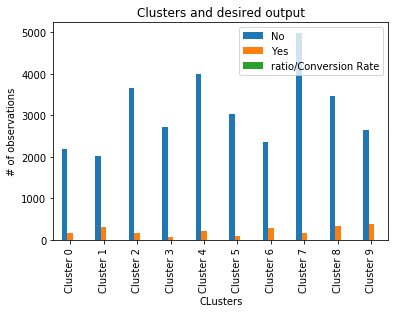

In [377]:
#create table to record y ratio for different cluster

tb=pd.concat([c0,c1,c2,c3,c4,c5,c6,c7,c8,c9],axis=0)
tb=tb.set_index([["Cluster 0","Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6",
                  "Cluster 7","Cluster 8","Cluster 9"]])

ratio=tb[1]/(tb[0]+tb[1])
tb=pd.concat([tb,ratio],axis=1)
tb.columns=["No","Yes","ratio/Conversion Rate"]
ratio_tb=pd.DataFrame(tb)

tb.plot(kind="bar")
plt.title("Clusters and desired output")
plt.xlabel("CLusters")
plt.ylabel("# of observations")
ratio_tb

#### With the table and bar graph above, we learn that cluster 1 has 0.137 conversion rate(yes/yes+no), cluster 9 has 0.125 conversion rate, and cluster 6 has 0.109 conversion rate, these 3 are the top 3 clusters with highest conversion rate among the 10 clusters.

### b). Cluster Representation (cluster centroid)

#### Cluster 1, the highest yes ratio (13.7%) among all clusters to subscribe the product to the total number of clients in the cluster

In [324]:
#to transform the value back with it's original state in 37 features,create new object scaler2

transform=bank_data[fs_column_index.tolist()]
scaler2=MinMaxScaler()
scaler2.fit(transform)

MinMaxScaler(copy=True, feature_range=(0, 1))

,mean
housing_no,1.000000
education_tertiary,0.997423
loan_no,0.878866
marital_single,0.761598
job_management,0.547680
month_aug,0.341924
marital_divorced,0.238402
job_technician,0.174399
month_jul,0.147766
loan_yes,0.121134


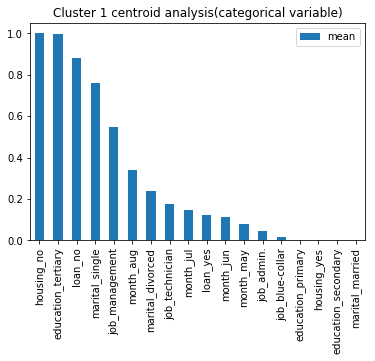

In [349]:
#cluster 1 customer characteristic

c1_1=cluster_1.drop("cluster_prediction",axis=1).drop("y",axis=1)
columns_withoutpy=cluster_1.columns.values[:-2]

cluster_1_tran=pd.DataFrame(scaler2.inverse_transform(c1_1),columns=columns_withoutpy)

cl1_char_catg=pd.DataFrame(cluster_1_tran.describe().T[["mean"]]).sort_values(by=['mean'],ascending=False)

cl1_char_catg.plot(kind='bar')
plt.title("Cluster 1 centroid analysis(categorical variable)")

cl1_char_catg

#### By looking at the centroid we can learn the characteristic for cluster 1. we learned that in average  the members from cluster 1 has no house loan and no personal loan, their education level are tertiary, they are single, most of them have a management career and some of them are technicians.
---


#### Cluster 9, the second highest yes ratio (12.5%) among all clusters to subscribe the product to the total number of clients in the cluster

,mean
education_secondary,1.000000
housing_no,1.000000
loan_no,0.860020
marital_single,0.747111
job_technician,0.287224
marital_divorced,0.252889
month_jul,0.237042
month_aug,0.198415
job_admin.,0.169363
month_jun,0.152856


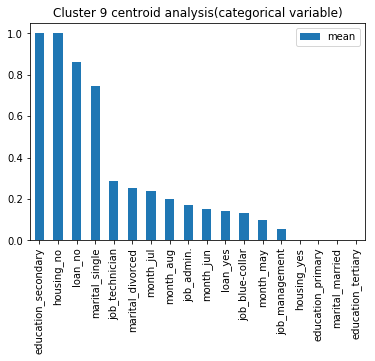

In [371]:
#cluster 9 customer characteristic

c9_1=cluster_9.drop("cluster_prediction",axis=1).drop("y",axis=1)
columns_withoutpy=cluster_9.columns.values[:-2]

cluster_9_tran=pd.DataFrame(scaler2.inverse_transform(c9_1),columns=columns_withoutpy)

cl9_char_catg=pd.DataFrame(cluster_9_tran.describe().T[["mean"]]).sort_values(by=['mean'],ascending=False)

cl9_char_catg.plot(kind='bar')
plt.title("Cluster 9 centroid analysis(categorical variable)")

cl9_char_catg

#### By looking at the features representing the cluster 9 above, we learn that in average the members from cluster 9 has no house loan and no personal loan, their education level are secondary, most of them are technicians, some of them are administrant or blue collar, and they are single.
---

#### Cluster 6, the third highest yes ratio (10.9%) among all clusters to subscribe the product to the total number of clients in the cluster

,mean
education_tertiary,1.000000
housing_no,1.000000
marital_married,1.000000
loan_no,0.880226
job_management,0.603390
month_aug,0.395480
month_jul,0.150659
job_technician,0.132203
month_jun,0.120904
loan_yes,0.119774


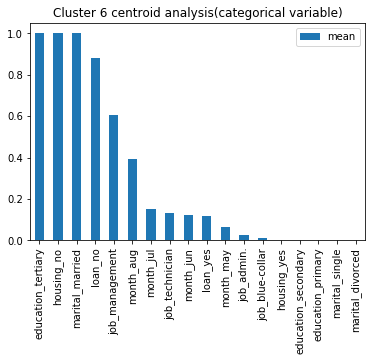

In [370]:
#cluster 6 customer characteristic

c6_1=cluster_6.drop("cluster_prediction",axis=1).drop("y",axis=1)
columns_withoutpy=cluster_6.columns.values[:-2]

cluster_6_tran=pd.DataFrame(scaler2.inverse_transform(c6_1),columns=columns_withoutpy)

cl6_char_catg=pd.DataFrame(cluster_6_tran.describe().T[["mean"]]).sort_values(by=['mean'],ascending=False)

cl6_char_catg.plot(kind='bar')
plt.title("Cluster 6 centroid analysis(categorical variable)")

cl6_char_catg

#### For cluster 6, we learned that in average the members in this cluster have no house loan and no personal loan, their education level are tertiary. Most of them have a management career and some of them works as technicians but unlike cluster 1 and 9,  in average, the members in cluster 6 are married.
---

#### Cluster 3 the lowest yes ratio (2.7%) among all clusters to subscribe the product to the total number of clients in the cluster

,mean
education_primary,1.000000
housing_yes,1.000000
loan_no,0.878701
marital_married,0.786657
job_blue-collar,0.704245
month_may,0.591866
month_jul,0.134856
month_jun,0.122369
loan_yes,0.121299
marital_single,0.120585


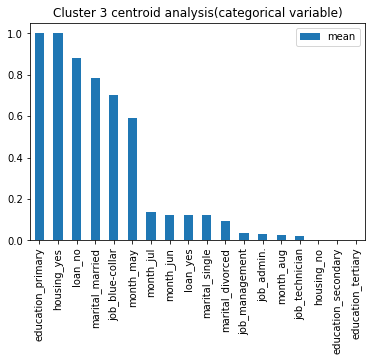

In [466]:
#cluster 3 customer characteristic

c3_1=cluster_3.drop("cluster_prediction",axis=1).drop("y",axis=1)
columns_withoutpy=cluster_3.columns.values[:-2]

cluster_3_tran=pd.DataFrame(scaler2.inverse_transform(c3_1),columns=columns_withoutpy)

cl3_char_catg=pd.DataFrame(cluster_3_tran.describe().T[["mean"]]).sort_values(by=['mean'],ascending=False)

cl3_char_catg.plot(kind='bar')
plt.title("Cluster 3 centroid analysis(categorical variable)")

cl3_char_catg

#### For cluster 3, we learned that, in average, the members in this cluster have house loan but no personal loan, their education level are primary, their career are blue-collar and most of them are married.
---

### c). Find the significant features that most influence the customers in the cluster to subscribe the product
Overall, I find that there seem to have some kind of promotion event on month August and July because for all the clusters these 2 features are significantly influencial for the customers to subscribe the product. Personal loan is another common features among clusters that are influencial for clients to subscribe the product.

#### Cluster 1

,weight,feature names
0,34.606455,month_aug
1,9.333181,loan_yes
2,5.633039,month_jul
3,5.555005,job_blue-collar
4,2.818804,job_technician
5,1.286391,loan_no
6,1.248028,marital_divorced
7,0.909500,job_management
8,0.560027,job_admin.
9,0.390669,marital_single


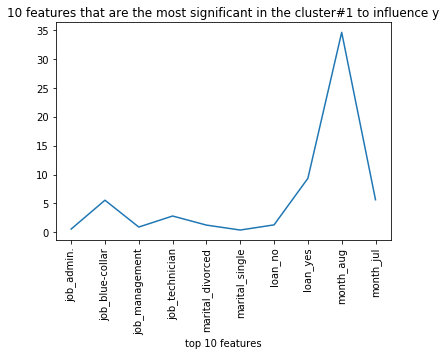

In [350]:
#use feature selection to select the top 10 feature that are most significant for cluster 1
from sklearn import feature_selection


c1_t=cluster_1.y
fs1 = feature_selection.SelectKBest(feature_selection.chi2, k=10)
X_train_fs = fs1.fit_transform(c1_1, c1_t)
c1_ftb=sorted(zip(fs1.scores_[fs1.get_support()] , columns_withoutpy[fs1.get_support()]),reverse=True)
c1_ftb=pd.DataFrame(c1_ftb,columns=["weight","feature names"])

plt.title("10 features that are the most significant in the cluster#1 to influence y")
plt.xlabel("top 10 features")
plt.plot(columns_withoutpy[fs1.get_support()],fs1.scores_[fs1.get_support()])
plt.xticks(rotation='vertical')

c1_ftb

#### For cluster 1, the most influencial features for the members in that cluster to subscribe the product seem to be when they are last contacted during August and July, also when they have personal loan. 
---

#### cluster 9

,weight,feature names
0,14.795568,month_aug
1,10.477628,loan_yes
2,9.998194,job_technician
3,9.164698,month_jul
4,6.604354,job_management
5,5.656730,month_jun
6,4.928632,job_blue-collar
7,4.696557,marital_divorced
8,2.910145,month_may
9,1.705380,loan_no


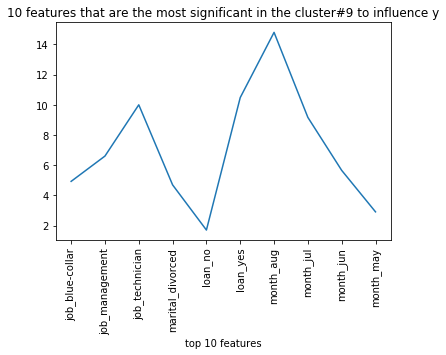

In [465]:
#use feature selection to select the top 10 feature that are most significant for cluster 9
from sklearn import feature_selection

c9_t=cluster_9.y
fs9 = feature_selection.SelectKBest(feature_selection.chi2, k=10)
X_train_fs = fs9.fit_transform(c9_1, c9_t)
c9_ftb=sorted(zip(fs9.scores_[fs9.get_support()] , columns_withoutpy[fs9.get_support()]),reverse=True)
c9_ftb=pd.DataFrame(c9_ftb,columns=["weight","feature names"])

plt.title("10 features that are the most significant in the cluster#9 to influence y")
plt.xlabel("top 10 features")
plt.plot(columns_withoutpy[fs9.get_support()],fs9.scores_[fs9.get_support()])
plt.xticks(rotation='vertical')

c9_ftb

#### For cluster 9, the most influencial features for the members in this cluster to subscribe the product seem to be when they are last contacted during August and July, when they have personal loan and when they have a career in technician or management. 
---

#### cluster 6

,weight,feature names
0,23.820810,month_aug
1,23.374721,loan_yes
2,20.012661,month_jul
3,3.180642,loan_no
4,2.527722,job_admin.
5,1.761999,month_may
6,0.654635,job_blue-collar
7,0.538561,job_management
8,0.168937,month_jun
9,0.004578,job_technician


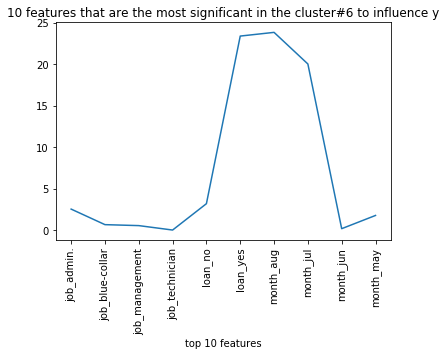

In [372]:
#use feature selection to select the top 10 feature that are most significant custer 6
from sklearn import feature_selection

c6_t=cluster_6.y
fs6 = feature_selection.SelectKBest(feature_selection.chi2, k=10)
X_train_fs = fs6.fit_transform(c6_1, c6_t)
c6_ftb=sorted(zip(fs6.scores_[fs6.get_support()] , columns_withoutpy[fs6.get_support()]),reverse=True)
c6_ftb=pd.DataFrame(c6_ftb,columns=["weight","feature names"])

plt.title("10 features that are the most significant in the cluster#6 to influence y")
plt.xlabel("top 10 features")
plt.plot(columns_withoutpy[fs6.get_support()],fs6.scores_[fs6.get_support()])
plt.xticks(rotation='vertical')

c6_ftb

#### For cluster 6, the most influencial features for the members in this cluster to subscribe the product seem to be when they are last contacted during August and July, and when they have personal loan.
---

#### Cluster 3

,weight,feature names
0,9.216228,marital_divorced
1,3.850980,month_may
2,2.592037,month_aug
3,2.388183,marital_married
4,1.741471,job_blue-collar
5,1.649994,marital_single
6,1.486063,job_technician
7,1.411060,month_jul
8,1.072607,job_admin.
9,0.548862,loan_yes


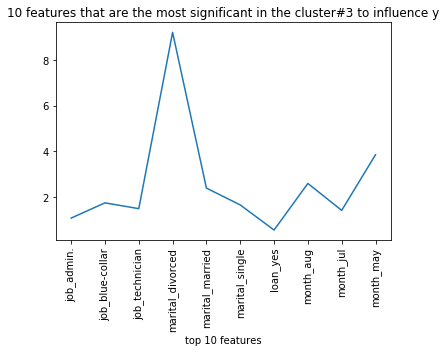

In [469]:
#use feature selection to select the top 10 feature that are most significant for custer 3
from sklearn import feature_selection

c3_t=cluster_3.y
fs3 = feature_selection.SelectKBest(feature_selection.chi2, k=10)
X_train_fs = fs3.fit_transform(c3_1, c3_t)
c3_ftb=sorted(zip(fs3.scores_[fs3.get_support()] , columns_withoutpy[fs3.get_support()]),reverse=True)
c3_ftb=pd.DataFrame(c3_ftb,columns=["weight","feature names"])

plt.title("10 features that are the most significant in the cluster#3 to influence y")
plt.xlabel("top 10 features")
plt.plot(columns_withoutpy[fs3.get_support()],fs3.scores_[fs3.get_support()])
plt.xticks(rotation='vertical')

c3_ftb

#### For cluster 3, the most influencial features for the members in this cluster to subscribe the product seem to be when they are last contacted during August and may, and when they are divorced.